<a href="https://colab.research.google.com/github/Andrei20035/ML/blob/main/02_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAKE_MOONS MODEL

In [74]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [75]:
dataset = make_moons(n_samples = 8000, random_state = 42)
features, labels = dataset
df_features = pd.DataFrame(features, columns = ["feature_1", "feature_2"])
df_labels = pd.DataFrame(labels, columns = ["labels"])

df = pd.concat([df_features, df_labels], axis = 1)
df

,feature_1,feature_2,labels
0,-0.168488,0.985704,0
1,-0.441804,0.897111,0
2,0.262043,0.965056,0
3,-0.722353,0.691525,0
4,0.036085,0.233790,1
...,...,...,...
7995,0.429054,-0.320988,1
7996,0.539268,-0.387539,1
7997,0.780325,0.625374,0
7998,1.951999,0.193898,1


In [76]:
df["feature_1"] = df["feature_1"] / 2.0

In [77]:
df

,feature_1,feature_2,labels
0,-0.084244,0.985704,0
1,-0.220902,0.897111,0
2,0.131021,0.965056,0
3,-0.361176,0.691525,0
4,0.018042,0.233790,1
...,...,...,...
7995,0.214527,-0.320988,1
7996,0.269634,-0.387539,1
7997,0.390162,0.625374,0
7998,0.975999,0.193898,1


In [78]:
X = df.drop("labels", axis = 1)
y = df["labels"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(6400, 1600, 6400, 1600)

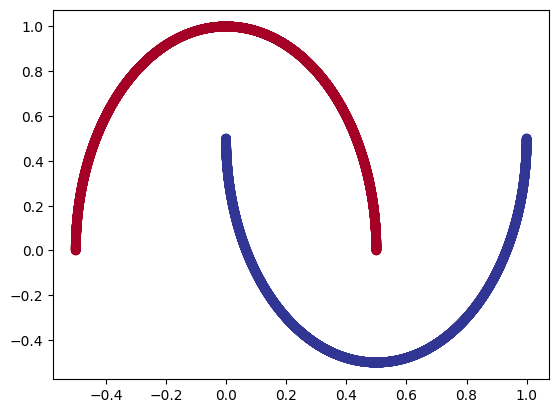

In [79]:
# Visualize data
import matplotlib.pyplot as plt
plt.scatter(df['feature_1'], df["feature_2"], c = y, cmap = plt.cm.RdYlBu)
plt.show()

In [80]:
# Set random seed
tf.random.set_seed(42)

# Create the model
moon_model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation = "relu"),
    tf.keras.layers.Dense(6, activation = "relu"),
    tf.keras.layers.Dense(6, activation = "relu"),
    tf.keras.layers.Dense(6, activation = "relu"),
    tf.keras.layers.Dense(6, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
moon_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                   optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                   metrics = ["accuracy"])

# Fit the model
moon_model.fit(X_train, y_train, epochs = 10)


Epoch 1/10
200/200 [==============================] - 3s 3ms/step - loss: 0.5494 - accuracy: 0.8239
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2458 - accuracy: 0.9000
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1237 - accuracy: 0.9461
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0450 - accuracy: 0.9864
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 8/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/10
200/200 [==============================] - 1s 3ms/step - loss: 8.2781e-04 - accuracy: 1.0000
Epoch 10/10
200/200 [==============================] - 1s 3ms/step - loss: 5.7894e-04 - accuracy

In [81]:
moon_model.evaluate(X_test, y_test)

50/50 [==============================] - 0s 2ms/step - loss: 4.7157e-04 - accuracy: 1.0000


[0.0004715663962997496, 1.0]

In [82]:

def plot_decision_boundary(model, X, y):
  """
  X and y needs to be numpy arrays

  Plots the decision boundary created by a model predicting on X.

  """
  # Define the axis boundaries of the plot and create meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1:
    print("Performing multi-class classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("Performing binary classification...")
    y_pred = np.round(np.max(y_pred, axis = 1)).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



313/313 [==============================] - 1s 1ms/step
Performing binary classification...


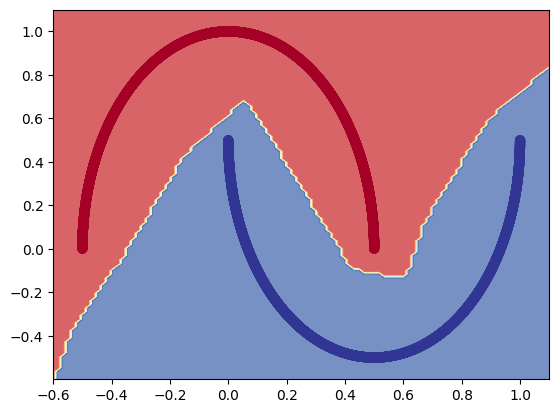

In [83]:
plot_decision_boundary(moon_model, X.values, y.values)


In [84]:
moon_model.evaluate(X_test, y_test)

50/50 [==============================] - 1s 9ms/step - loss: 4.7157e-04 - accuracy: 1.0000


[0.0004715663962997496, 1.0]

#FASHION MNIST MODEL

In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [13]:
# Create a list of labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

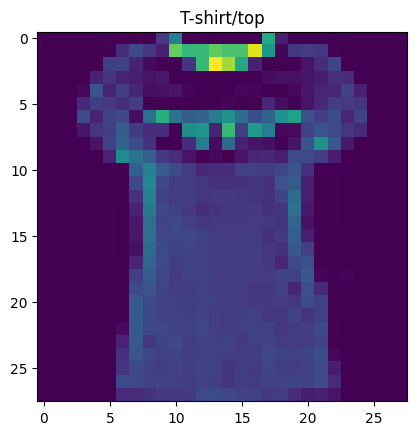

In [14]:
# Show image and its label
index = 34
plt.imshow(train_data[index])
plt.title(class_names[train_labels[index]])

In [15]:
# One hot encode train and test labels
test_labels = tf.one_hot(test_labels, depth = 10)
train_labels = tf.one_hot(train_labels, depth = 10)

In [16]:
# Normalize test_data and train_data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [17]:
train_labels[1], test_labels[1]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

In [20]:
# Now that we have the data normalized, let's try to build a model with it.

# Set random seed
tf.random.set_seed(77)

# Create our model
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(28, activation = "relu"),
    tf.keras.layers.Dense(23, activation = "relu"),
    tf.keras.layers.Dense(23, activation = "relu"),
    tf.keras.layers.Dense(18, activation = "relu"),
    tf.keras.layers.Dense(18, activation = "relu"),
    tf.keras.layers.Dense(15, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile our model
mnist_model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                    optimizer = tf.keras.optimizers.SGD(),
                    metrics = ["accuracy"])

# Learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.018 * 10 ** (epoch/20))

# Fit the model
history = mnist_model.fit(train_data_norm,
                train_labels,
                epochs = 18,
                validation_data = (train_data_norm, train_labels),
                callbacks = [lr_scheduler])


Epoch 1/18
1875/1875 [==============================] - 15s 6ms/step - loss: 1.0644 - accuracy: 0.6118 - val_loss: 0.6754 - val_accuracy: 0.7565 - lr: 0.0180
Epoch 2/18
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5279 - accuracy: 0.8104 - val_loss: 0.4380 - val_accuracy: 0.8454 - lr: 0.0202
Epoch 3/18
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4554 - accuracy: 0.8346 - val_loss: 0.4392 - val_accuracy: 0.8437 - lr: 0.0227
Epoch 4/18
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4234 - accuracy: 0.8463 - val_loss: 0.4133 - val_accuracy: 0.8503 - lr: 0.0254
Epoch 5/18
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4068 - accuracy: 0.8523 - val_loss: 0.3783 - val_accuracy: 0.8619 - lr: 0.0285
Epoch 6/18
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3928 - accuracy: 0.8570 - val_loss: 0.3569 - val_accuracy: 0.8694 - lr: 0.0320
Epoch 7/18
1875/1875 [==============================

<Axes: >

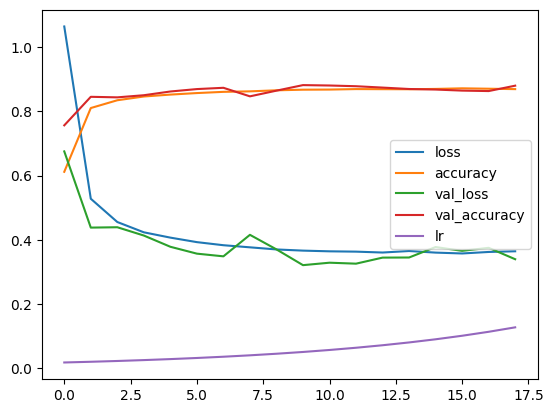

In [21]:
pd.DataFrame(history.history).plot()


In [98]:
# Let's try to change the optimizer

((8000, 2), (8000,), numpy.ndarray, pandas.core.series.Series)

In [ ]:
# Now that we have the data normalized, let's try to build a model with it.

# Set random seed
tf.random.set_seed(77)

# Create our model
mnist_model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile our model
mnist_model2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                    metrics = ["accuracy"])

# Learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * 10 ** (epoch/20))

# Fit the model
history = mnist_model2.fit(train_data_norm,
                train_labels,
                epochs = 18,
                validation_data = (train_data_norm, train_labels))
                #callbacks = [lr_scheduler]

<Axes: >

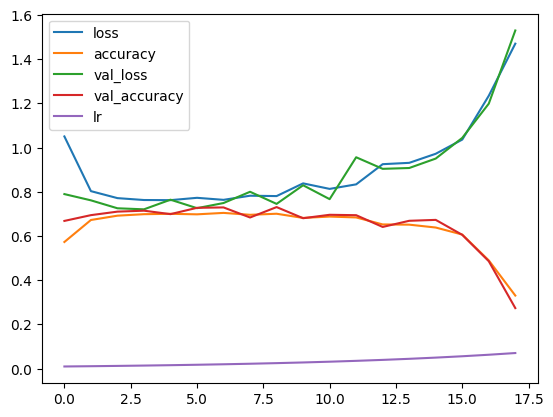

In [8]:
pd.DataFrame(history.history).plot()

In [7]:
mnist_model2.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 19.5881 - accuracy: 0.2859


[19.58810043334961, 0.2858999967575073]

It looks like the first mnist_model has the bast accuracy so far, so we'll go with it

Let's create a confusion matrix

In [35]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
pred = mnist_model.predict(test_data)
test_labels_np = test_labels.numpy()
pred_labels = np.argmax(pred, axis = 1)
test_labels_int = np.argmax(test_labels_np, axis = 1)

# Create confusion_matrix
confusion_matrix(test_labels_int, pred_labels)

313/313 [==============================] - 1s 2ms/step


array([[834,   3,   4,   8,  10,   2, 117,   0,  16,   6],
       [ 10, 958,   1,  14,  10,   0,   0,   3,   2,   2],
       [ 16,   7, 460,   8, 416,   0,  79,   0,  13,   1],
       [115,  11,   3, 731, 104,   0,  18,   4,   9,   5],
       [  1,   0,  16,   6, 949,   2,  17,   0,   9,   0],
       [  1,   1,   0,   0,   3, 827,   0,  23,  19, 126],
       [156,   3,  27,  11, 267,   0, 507,   0,  29,   0],
       [  0,   0,   0,   0,   0,  19,   0, 665,  23, 293],
       [  2,   0,   1,   7,  10,   1,   5,   1, 971,   2],
       [  0,   0,   0,   0,   0,   1,   0,   1,   1, 997]])

In [32]:
pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

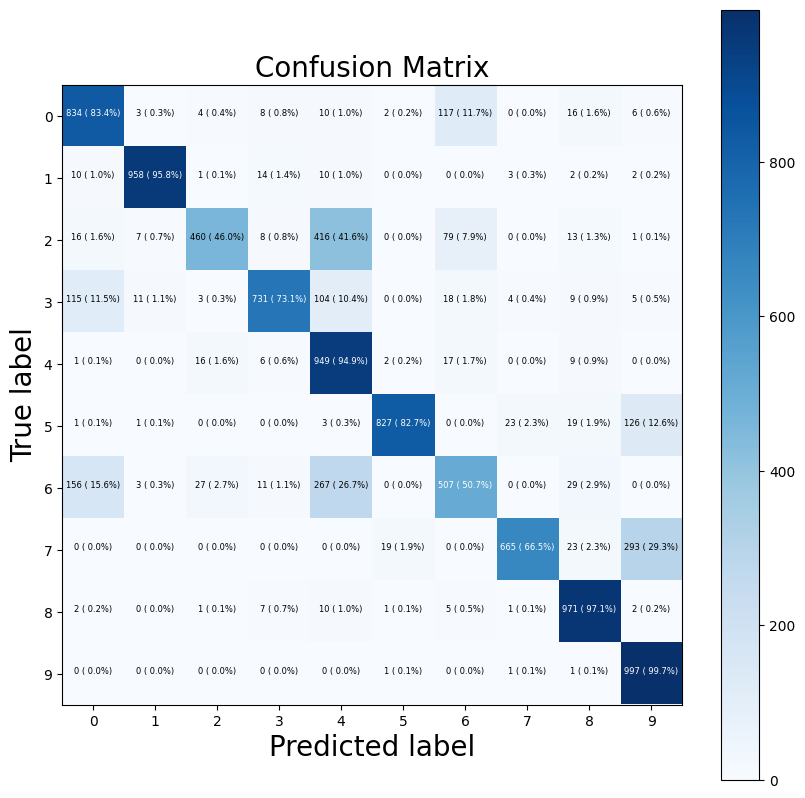

In [41]:
# Note: the confusion matrix code we're about to write is a remix of sci-kit learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(test_labels_int, tf.round(pred_labels))
cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize = figsize)

#Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title = "Confusion Matrix",
       xlabel = "Predicted label",
       ylabel = "True label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100: .1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i, j] > threshold else "black",
           size = 6)